In this notebook we will correlate different features.

In [1]:
from sklearn.decomposition import PCA
from pathlib import Path
import numpy as np

In [5]:
datapath = Path('data_npy/gtzan')

feature_names = ['mfcc', 'sc', 'mel', 'stft', 'zero']

In [6]:
pca = PCA(n_components=10)

features = [
    pca.fit_transform(np.load(datapath / f'{f}.npy'))
    for f in feature_names
]

In [12]:
dd = np.stack([
    f.ravel()
    for f in features
])
dd.shape

(5, 7990)

In [16]:
cf = np.corrcoef(dd)

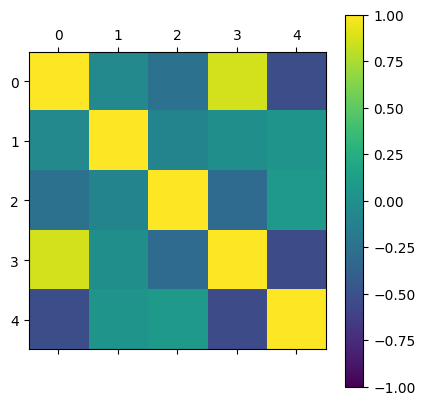

In [19]:
import matplotlib.pyplot as plt

plt.matshow(cf)
plt.clim(-1, 1)
plt.colorbar()

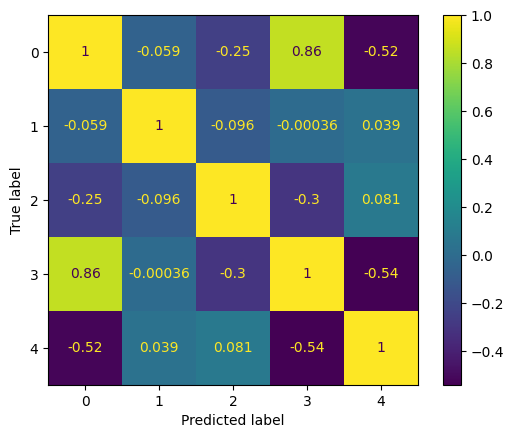

In [25]:
from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay(cf)

disp.plot()